# Task 3
Jupyter Notebook: 

In [24]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
import seaborn as sns
import os


# Loading Data
Additionally we need the titles to create captions for the plots

In [31]:


food_data = pd.read_csv("../../data/food.csv")

titles = food_data.iloc[:, 0]
food_data # show data

,Unnamed: 0,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr.Veg
0,Albania,10.1,1.4,0.5,8.9,0.2,42.3,0.6,5.5,1.7
1,Austria,8.9,14.0,4.3,19.9,2.1,28.0,3.6,1.3,4.3
2,Belgium,13.5,9.3,4.1,17.5,4.5,26.6,5.7,2.1,4.0
3,Bulgaria,7.8,6.0,1.6,8.3,1.2,56.7,1.1,3.7,4.2
4,Czechoslovakia,9.7,11.4,2.8,12.5,2.0,34.3,5.0,1.1,4.0
5,Denmark,10.6,10.8,3.7,25.0,9.9,21.9,4.8,0.7,2.4
6,E Germany,8.4,11.6,3.7,11.1,5.4,24.6,6.5,0.8,3.6
7,Finland,9.5,4.9,2.7,33.7,5.8,26.3,5.1,1.0,1.4
8,France,18.0,9.9,3.3,19.5,5.7,28.1,4.8,2.4,6.5
9,Greece,10.2,3.0,2.8,17.6,5.9,41.7,2.2,7.8,6.5


Scale only numeric values

In [16]:

numeric_cols = food_data.select_dtypes(include=[np.number]).columns
food_numeric = food_data[numeric_cols]
scaler = StandardScaler()
food_scaled = scaler.fit_transform(food_numeric)

#Silhouette Score

In [18]:

silhouette_scores = []
for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, n_init=25, random_state=42)
    kmeans.fit(food_scaled)
    score = silhouette_score(food_scaled, kmeans.labels_)
    silhouette_scores.append(score)

optimal_k = np.argmax(silhouette_scores) + 2
final_kmeans = KMeans(n_clusters=optimal_k, n_init=25, random_state=42)
final_kmeans.fit(food_scaled)

KMeans(n_clusters=3, n_init=25, random_state=42)

Show result with different colors

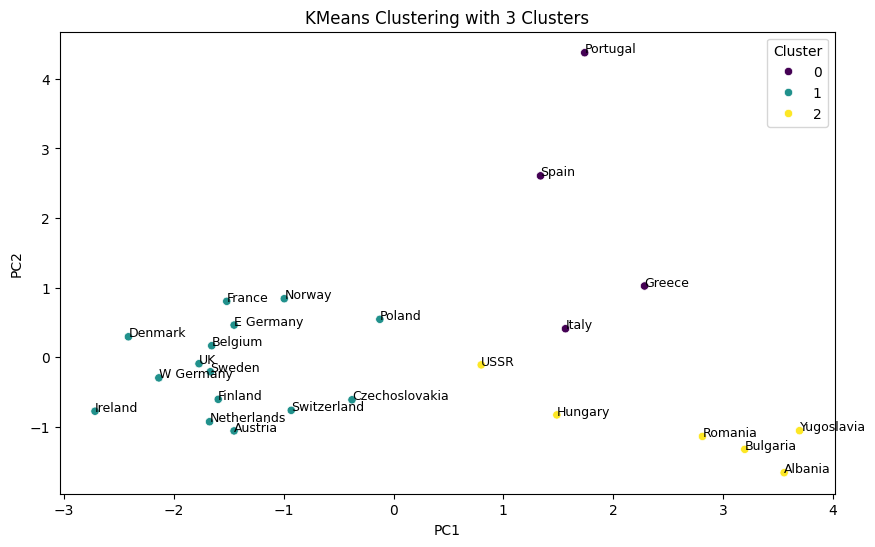

In [22]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(food_scaled)
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df['Cluster'] = final_kmeans.labels_
pca_df['Title'] = titles

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', palette='viridis', data=pca_df)
for i in range(pca_df.shape[0]):
    plt.text(pca_df['PC1'][i], pca_df['PC2'][i], pca_df['Title'][i], fontsize=9)
plt.title(f'KMeans Clustering with {optimal_k} Clusters')
plt.show()

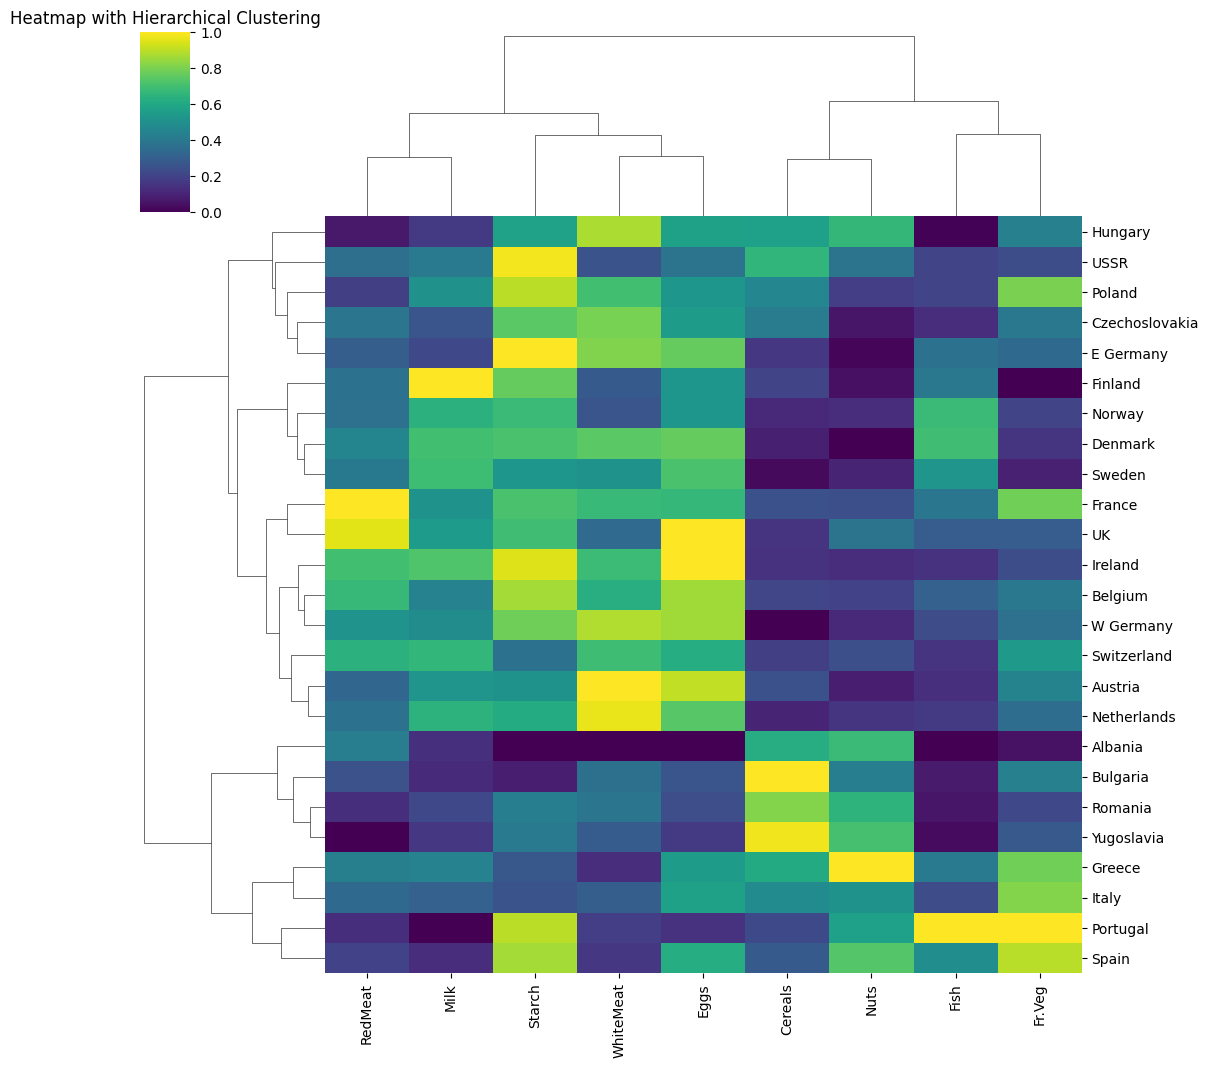

In [32]:
# Heatmap with clustering of samples and variables
clustermap = sns.clustermap(food_scaled, method='ward', cmap='viridis', row_cluster=True, col_cluster=True, 
                            row_linkage=linked, col_linkage=None, standard_scale=1)

# Add titles to the heatmap
clustermap.ax_heatmap.set_yticklabels(titles[clustermap.dendrogram_row.reordered_ind], rotation=0)
clustermap.ax_heatmap.set_xticklabels(food_numeric.columns[clustermap.dendrogram_col.reordered_ind], rotation=90)

plt.title('Heatmap with Hierarchical Clustering')
plt.show()

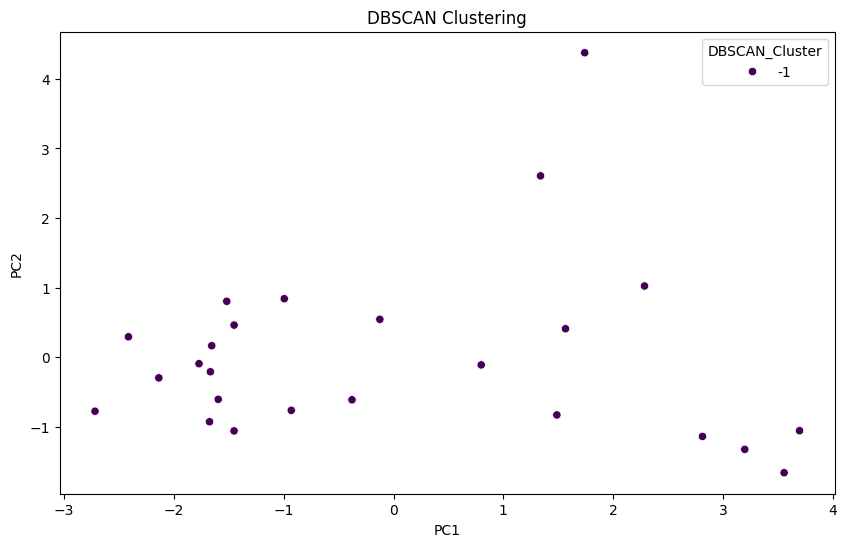

In [33]:

db = DBSCAN(eps=0.5, min_samples=5)
db.fit(food_scaled)
pca_df['DBSCAN_Cluster'] = db.labels_

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='DBSCAN_Cluster', palette='viridis', data=pca_df)
plt.title('DBSCAN Clustering')
plt.show()
